<h1>Grover's Algorithm</h1>

https://en.wikipedia.org/wiki/Grover%27s_algorithm

## Imports

In [10]:
%matplotlib inline

In [11]:
from IPython.display import display

In [12]:
from sympy import init_printing
init_printing(use_latex=True)

In [13]:
from sympy import sqrt, symbols, Rational
from sympy import expand, Eq, Symbol, simplify, exp, sin
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.grover import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

## Grover's algorithm for 3 qubits

In [14]:
nqubits = 3

Grover's algorithm is a quantum algorithm which searches an unordered database (inverts a function). It provides polynomial speedup over classical brute-force search ($O(\sqrt{N}) vs. O(N))$ 

Define a black box function that returns True if it is passed the state we are searching for.

In [15]:
def black_box(qubits):
    return True if qubits == IntQubit(1, qubits.nqubits) else False

Build a uniform superposition state to start the search.

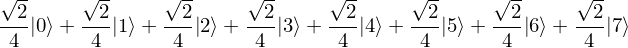

In [16]:
psi = superposition_basis(nqubits)
psi

In [17]:
v = OracleGate(nqubits, black_box)

Perform two iterations of Grover's algorithm.  Each iteration, the amplitude of the target state increases.

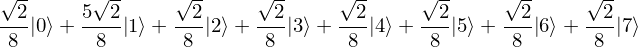

In [18]:
iter1 = qapply(grover_iteration(psi, v))
iter1

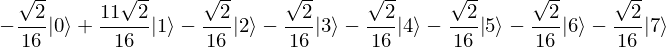

In [19]:
iter2 = qapply(grover_iteration(iter1, v))
iter2

A single shot measurement is performed to retrieve the target state.

In [20]:
measure_all_oneshot(iter2)